# Regresión lineal (polinómica)

En este caso, vamos a estimar el precio de una vivienda utilizando transformaciones sobre las variables. De nuevo, utilizaremos la base de datos de viviendas [House Sales in King COunty, USA](https://www.kaggle.com/harlfoxem/housesalesprediction).

### La dependencia entre la variable de respuesta y la regresora frecuentemente no es lineal.

¿Cómo determinar la significancia de la desviación del supuesto de linearidad?

Una de las maneras más sencillas es usando la regresión polinomial

In [1]:
# cargamos librerías necesarias
import numpy  as np  
import pandas as pd

import matplotlib.pyplot as plt # para dibujar
%matplotlib inline

## Cargar datos

In [2]:
# cargamos fichero
house_data = pd.read_csv("../data/house_data.csv") 

# Eliminamos las columnas id y date 
house_data = house_data.drop(['id','date'], axis=1)

# convertir las variables en pies al cuadrado en metros al cuadrado 
feetFeatures = ['sqft_living','sqft_lot','sqft_above','sqft_basement','sqft_living15','sqft_lot15']
house_data[feetFeatures] = house_data[feetFeatures].apply(lambda x: x * 0.3048 * 0.3048)

# renombramos
house_data.columns = ['price','bedrooms','bathrooms','sqm_living','sqm_lot','floors','waterfront','view','condition',
                      'grade','sqm_above','sqm_basement','yr_built','yr_renovated','zip_code','lat','long',
                      'sqm_living15','sqm_lot15']

# añadimos esta nueva variable
house_data['years'] = 2018 - house_data['yr_built']

In [3]:
house_data.head(5)

,price,bedrooms,bathrooms,sqm_living,sqm_lot,floors,waterfront,view,condition,grade,sqm_above,sqm_basement,yr_built,yr_renovated,zip_code,lat,long,sqm_living15,sqm_lot15,years
0,221900.0,3,1.00,109.625587,524.902176,1.0,0,0,3,7,109.625587,0.000000,1955,0,98178,47.5112,-122.257,124.490074,524.902176,63
1,538000.0,3,2.25,238.760813,672.803816,2.0,0,0,3,7,201.599597,37.161216,1951,1991,98125,47.7210,-122.319,157.006138,709.686323,67
2,180000.0,2,1.00,71.535341,929.030400,1.0,0,0,3,6,71.535341,0.000000,1933,0,98028,47.7379,-122.233,252.696269,748.984308,85
3,604000.0,4,3.00,182.089958,464.515200,1.0,0,0,5,7,97.548192,84.541766,1965,0,98136,47.5208,-122.393,126.348134,464.515200,53
4,510000.0,3,2.00,156.077107,750.656563,1.0,0,0,3,8,156.077107,0.000000,1987,0,98074,47.6168,-122.045,167.225472,697.051509,31


## Regresión lineal (polinómica)

En primer lugar, vamos a utilizar sólo la variable $x = $*sqm_living* y potencias de la misma, para predecir $y = $*price*, de tal forma que  $$y=\omega_0 + \omega_1x + \omega_2 x^2 + \omega_3 x^3 + \omega_4 x^4 + \ldots$$

In [4]:
myFeatures = ['price','sqm_living']

# convertimos el DataFrame al formato necesario para scikit-learn
data = house_data[myFeatures].as_matrix() 

y = data[:,0:1]     # nos quedamos con la 1ª columna, price
x = data[:,1:]     # nos quedamos con el resto (sqm_living)

In [5]:
from sklearn.preprocessing import PolynomialFeatures

# modelo lineal y = w0 + w1 x
X1 = x 
# modelo cuadrático y = w0 + w1 x + w2 x^2
X2 = PolynomialFeatures(2,include_bias = False).fit_transform(x)
# modelo cúbico y = w0 + w1 x + w2 x^2 + w3 x^3
X3 = PolynomialFeatures(3,include_bias = False).fit_transform(x)
# modelo orden 15 y = w0 + w1 x + w2 x^2 + w3 x^3 + ... + w15 x^15
X15 = PolynomialFeatures(15,include_bias = False).fit_transform(x)

### Entrenamiento 

In [6]:
# 1. Cargamos librería y creamos objeto lr
from sklearn.linear_model import LinearRegression

# 2. Entrenamos los modelos:

# modelo lineal
lr1 = LinearRegression()
lr1.fit(X1,y)

# modelo cuadrático
lr2 = LinearRegression()
lr2.fit(X2,y)

# modelo cúbico
lr3 = LinearRegression()
lr3.fit(X3,y)

# modelo potencia 15
lr15 = LinearRegression()
lr15.fit(X15,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Vamos a representar los ajustes obtenidos

In [7]:
newx   = np.linspace(0,max(X1),1000).reshape(-1,1)
newx2  = PolynomialFeatures(2,include_bias = False).fit_transform(newx)
newx3  = PolynomialFeatures(3,include_bias = False).fit_transform(newx)
newx15 = PolynomialFeatures(15,include_bias = False).fit_transform(newx)

fw1  = lr1.predict(newx)
fw2  = lr2.predict(newx2)
fw3  = lr3.predict(newx3)
fw15 = lr15.predict(newx15)

El modelo de orden 15 es demasiado complejo para ajustarlo a los datos:

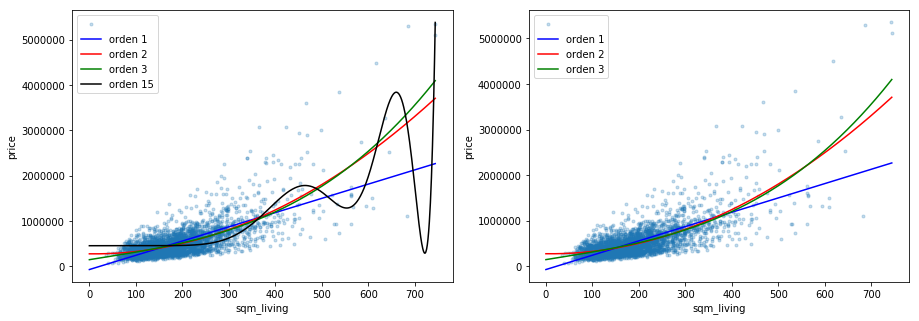

In [8]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(X1,y,'.',alpha=0.25)
plt.plot(newx,fw1,'b-')
plt.plot(newx,fw2,'r-')
plt.plot(newx,fw3,'g-')
plt.plot(newx,fw15,'k-')
plt.xlabel('sqm_living')
plt.ylabel('price')
plt.legend(['','orden 1','orden 2','orden 3','orden 15'])

plt.subplot(1,2,2)
plt.plot(X1,y,'.',alpha=0.25)
plt.plot(newx,fw1,'b-')
plt.plot(newx,fw2,'r-')
plt.plot(newx,fw3,'g-')
plt.xlabel('sqm_living')
plt.ylabel('price')
plt.legend(['','orden 1','orden 2','orden 3'])
plt.show()

Calculemos ahora el error que estamos cometiendo con cada modelo

In [9]:
from sklearn.metrics import mean_squared_error

y1  = lr1.predict(X1)
y2  = lr2.predict(X2)
y3  = lr3.predict(X3)
y15 = lr15.predict(X15)

mse1  = mean_squared_error(y,y1)
mse2  = mean_squared_error(y,y2)
mse3  = mean_squared_error(y,y3)
mse15 = mean_squared_error(y,y15)

print ('Modelo 1:  %0.3g' % mse1)
print ('Modelo 2:  %0.3g' % mse2)
print ('Modelo 3:  %0.3g' % mse3)
print ('Modelo 15: %0.3g' % mse15)


Modelo 1:  7.29e+10
Modelo 2:  6.48e+10
Modelo 3:  6.45e+10
Modelo 15: 7.4e+10


<div class = "alert alert-success">
¿Cuál es el modelo con menos error?
</div>

## Interacción entre variables

Además de las variables iniciales del problema, siempre podemos crear nuevas variables que sean transformaciones y/o intereacciones de las mismas. Vamos a crear 4 nuevos atributos:

* bedrooms_squared = bedrooms\*bedrooms
* bed_bath_rooms = bedrooms\*bathrooms
* log_sqm_living = log(sqm_living)
* lat_plus_long = lat + long 


In [10]:
from math import log

house_data['bedrooms_squared'] = house_data['bedrooms'].apply(lambda x: x**2)
house_data['bed_bath_rooms'] = house_data['bedrooms']*house_data['bathrooms']
house_data['log_sqm_living'] = house_data['sqm_living'].apply(lambda x: log(x))
house_data['lat_plus_long'] = house_data['lat']*house_data['long']

In [11]:
house_data.head(5)

,price,bedrooms,bathrooms,sqm_living,sqm_lot,floors,waterfront,view,condition,grade,...,zip_code,lat,long,sqm_living15,sqm_lot15,years,bedrooms_squared,bed_bath_rooms,log_sqm_living,lat_plus_long
0,221900.0,3,1.00,109.625587,524.902176,1.0,0,0,3,7,...,98178,47.5112,-122.257,124.490074,524.902176,63,9,3.00,4.697071,-5808.576778
1,538000.0,3,2.25,238.760813,672.803816,2.0,0,0,3,7,...,98125,47.7210,-122.319,157.006138,709.686323,67,9,6.75,5.475462,-5837.184999
2,180000.0,2,1.00,71.535341,929.030400,1.0,0,0,3,6,...,98028,47.7379,-122.233,252.696269,748.984308,85,4,2.00,4.270192,-5835.146731
3,604000.0,4,3.00,182.089958,464.515200,1.0,0,0,5,7,...,98136,47.5208,-122.393,126.348134,464.515200,53,16,12.00,5.204501,-5816.213274
4,510000.0,3,2.00,156.077107,750.656563,1.0,0,0,3,8,...,98074,47.6168,-122.045,167.225472,697.051509,31,9,6.00,5.050350,-5811.392356


¿Por qué hemos hecho esta transformaciones?

* Elevar al cuadrado el número de habitaciones incrementará la separación entre viviendas de no muchas habitaciones (supongamos $1$ habitación),  y las viviendas con muchas habitaciones (supongamos $4$ habitaciones), dado que $1^2=1$ y $4^2 = 16$.
* Multiplicar las variables *bedrooms* y *bathrooms* genera un atributo cuyo valor será grande cuando conjuntamente ambas variables lo sean.
* Utilizar el logaritmo del tamaño de la vivienda separa lo valores pequeños y agrupa los valores grandes.
* Sumar latitud y longitud no mucho tiene sentido, pero la añadimos igualmente para ver que supone no conocer el negocio

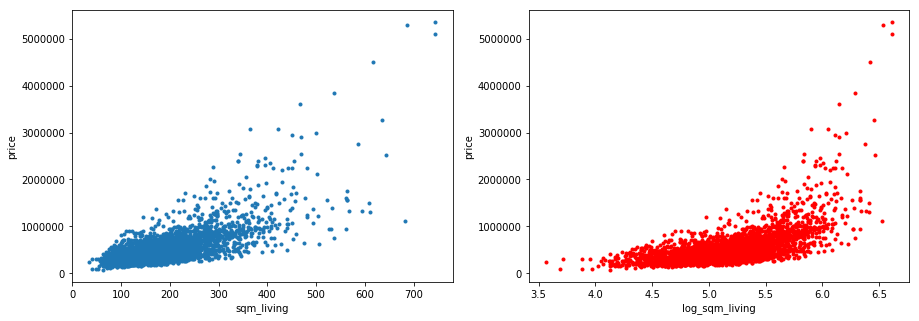

In [12]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(house_data['sqm_living'],house_data['price'],'.')
plt.xlabel('sqm_living')
plt.ylabel('price')

plt.subplot(1,2,2)
plt.plot(house_data['log_sqm_living'],house_data['price'],'r.')
plt.xlabel('log_sqm_living')
plt.ylabel('price')
plt.show()

Utilicemos las nuevas variables definidas para construir un modelo de regresión lineal junto con la variable *sqm_living*:

In [13]:
myFeatures = ['price','bedrooms_squared','bed_bath_rooms','log_sqm_living','lat_plus_long','sqm_living']

# convertimos el DataFrame al formato necesario para scikit-learn
data = house_data[myFeatures].as_matrix() 

y = data[:,0:1]     # nos quedamos con la 1ª columna, price
X = data[:,1:]     # nos quedamos con el resto

Como utilizamos variables con distintas dimensiones, conviene escalarlas:

In [14]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X)
Xs = scaler.transform(X)

In [15]:
# Entrenamos
lr = LinearRegression()
lr.fit(Xs,y)

# Predecimos y cuantificamos error
ypred = lr.predict(Xs)

mse = mean_squared_error(y,ypred)
print ('MSE: %0.3g' % mse)

MSE: 5.59e+10
